# Customer Segmentation

* Importing the Libraries

In [75]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import linkage, dendrogram

* Importing the DataSet


In [37]:
df=pd.read_csv('Mall_Customers.csv')

* Data Analytics 

In [38]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [39]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


* Shape of the Dataset

In [40]:
df.shape

(200, 5)

* Getting Basic Information

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


No NaN values

Gender col should be handled

* Getting the Statistical data

In [42]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Data Visualization

<AxesSubplot:xlabel='Age', ylabel='count'>

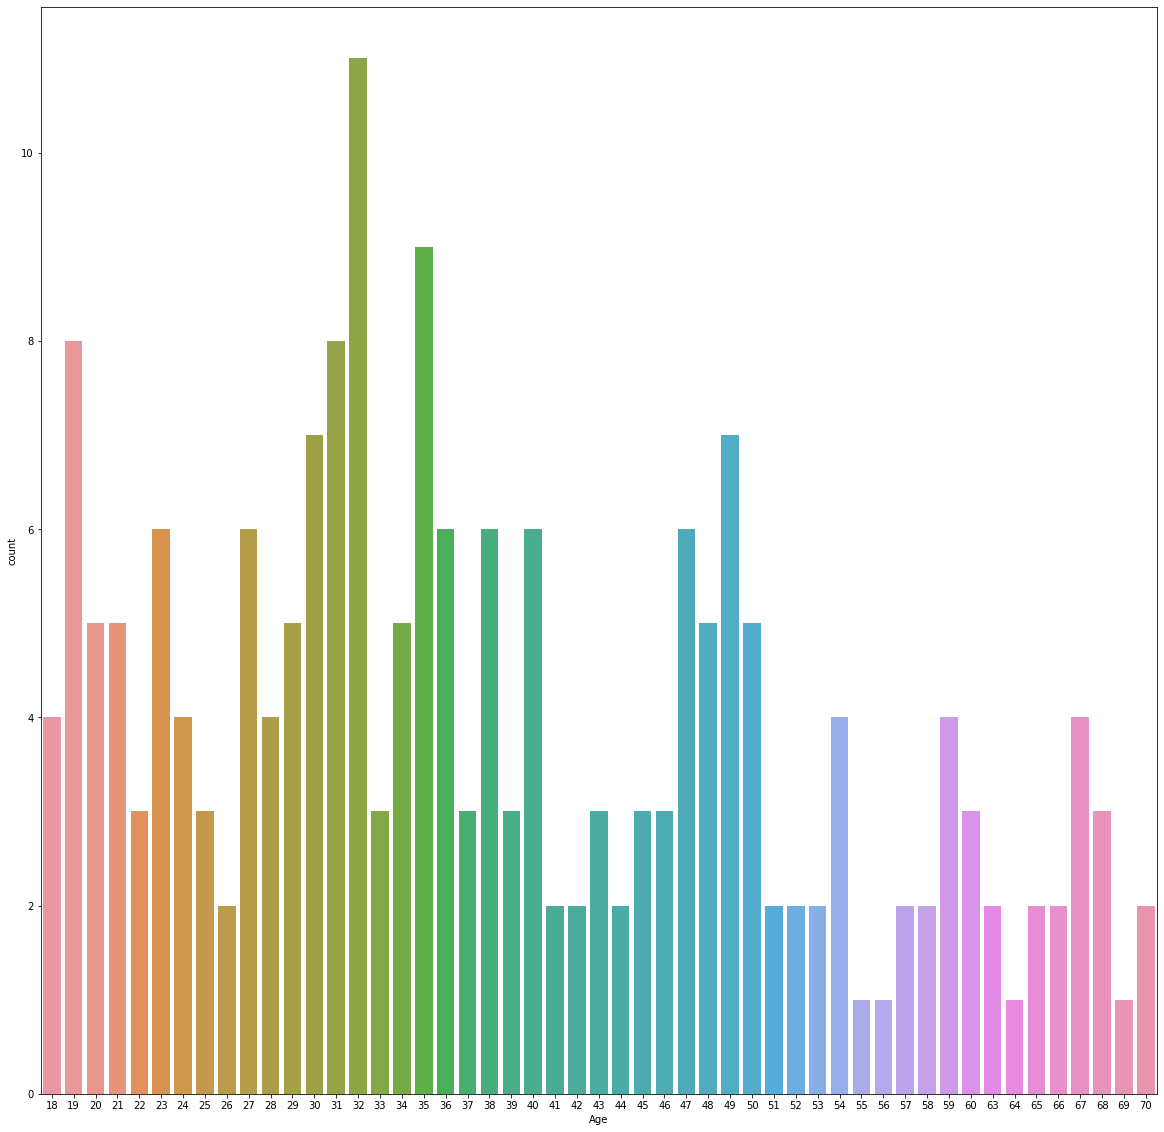

In [43]:
plt.figure(figsize=(20,20))
sns.countplot(data=df,x='Age')

The age group of 31 visits the mall mostly

* Percentage of the male & Female's visit the mall

In [44]:
male_per=(len(df[df.Genre=='Male'])/len(df.Genre))*100
female_per=(len(df[df.Genre=='Female'])/len(df.Genre))*100

Text(0.5, 1.0, 'Male & Female Percentages')

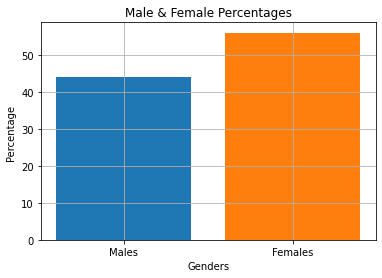

In [45]:

plt.bar('Males',male_per)
plt.bar('Females' , female_per)
plt.grid() 
plt.xlabel('Genders')
plt.ylabel('Percentage ')
plt.title('Male & Female Percentages')

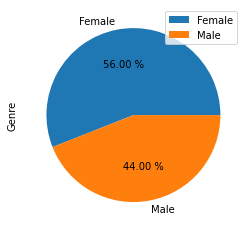

In [46]:

df.Genre.value_counts().plot(kind='pie',autopct="%0.2f %%")
plt.legend()

No.of Females visit the mall mostly when compared to men

* Plotting the distribution of the Income

Text(0.5, 1.0, 'Distribution of Annual Salaries')

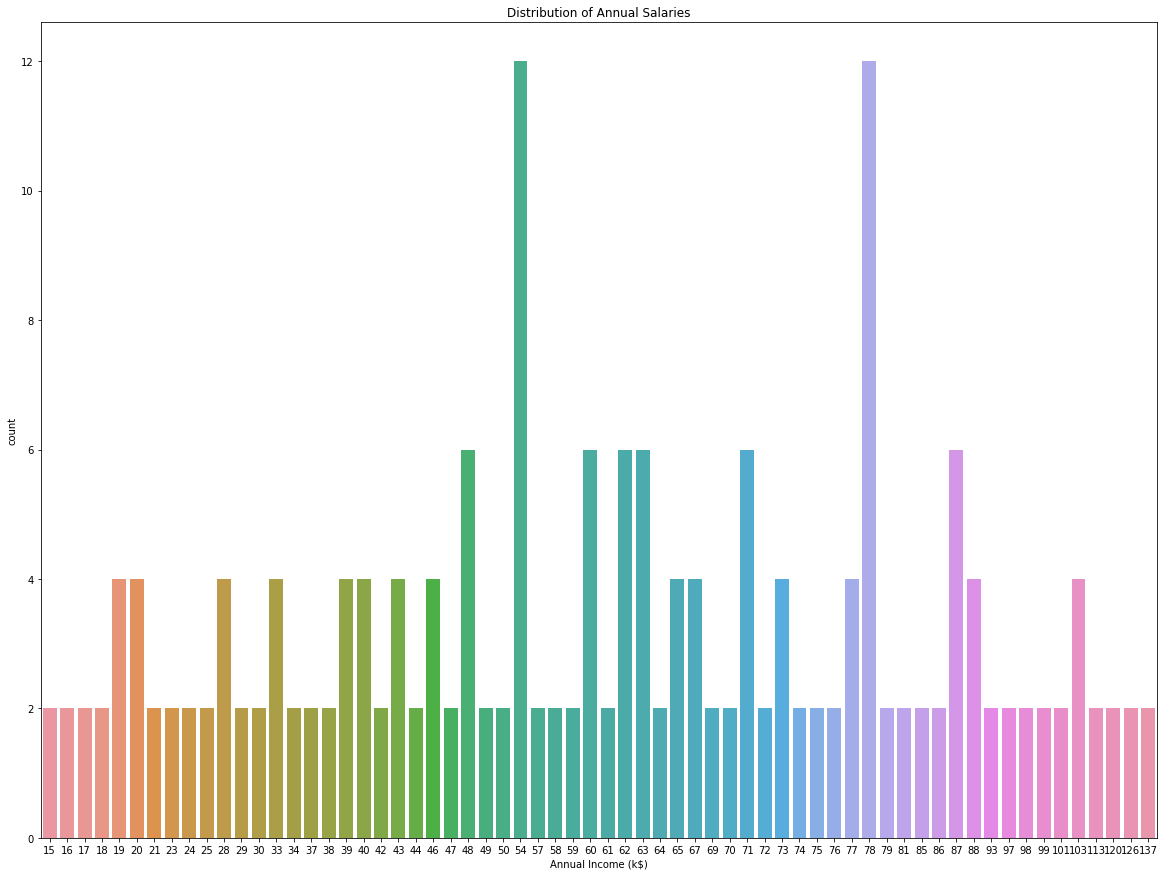

In [47]:
plt.figure(figsize=(20,15))
sns.countplot(data=df,x="Annual Income (k$)")
plt.title("Distribution of Annual Salaries")

The customers whose Annual income is 54k & 78k visit the mall frequently

* Annual Income distribution wrt to Male & Female

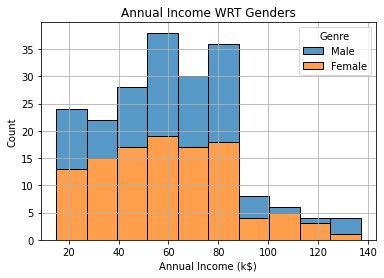

In [48]:
sns.histplot(df,x='Annual Income (k$)',hue='Genre',multiple="stack")
plt.title('Annual Income WRT Genders')
plt.grid()

* Seaborn lmplot

In [49]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

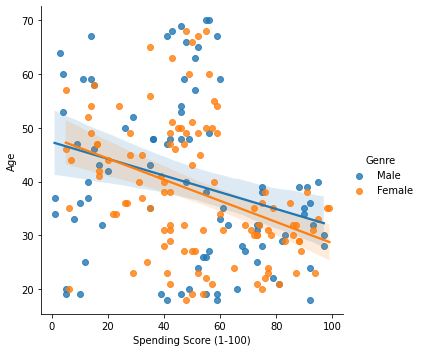

In [50]:
sns.lmplot(data=df,x='Spending Score (1-100)',y='Age',hue='Genre')

lmplot gives the best fit line for the scatter plot

# ML

In [51]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


* Creating a new Df

In [52]:
newdf=df.copy()

* Lable Encoding

In [53]:
le=LabelEncoder()

In [54]:
newdf.Genre=le.fit_transform(newdf.Genre)

In [55]:
newdf.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


* Dropping the Customer id

In [56]:
newdf.drop('CustomerID',axis=1,inplace=True)

In [57]:
newdf.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


* KMean Clustering

* Hyperparameter Tuning

In [58]:
ssd=[]
for i in range (1,11):
    kmodel=KMeans(n_clusters=i,n_init=15,max_iter=500)
    kmodel.fit(newdf)
    ssd.append(kmodel.inertia_)

* Plotting the Cluster's & K's

Text(0.5, 1.0, 'Ellbow Plot')

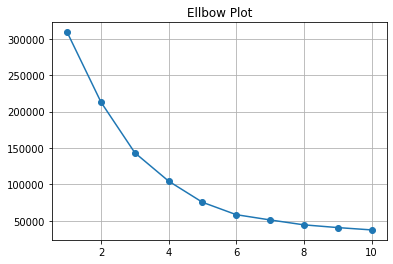

In [60]:
plt.plot(range(1,11),ssd,marker='o')
plt.grid()
plt.title("Ellbow Plot")

We can take the value of k=6, as the difference is very minimum

We can make 6 categories of those customers

* Model Selection

In [61]:
kmodel=KMeans(n_clusters=6)


* Fitting & Predicting the Model

In [64]:
kmodel.fit_predict(newdf)

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 5, 3, 1, 4,
       1, 3, 5, 4, 4, 4, 5, 4, 4, 5, 5, 5, 5, 5, 4, 5, 5, 4, 5, 5, 5, 4,
       5, 5, 4, 4, 5, 5, 5, 5, 5, 4, 5, 4, 4, 5, 5, 4, 5, 5, 4, 5, 5, 4,
       4, 5, 5, 4, 5, 4, 4, 4, 5, 4, 5, 4, 4, 5, 5, 4, 5, 4, 5, 5, 5, 5,
       5, 4, 4, 4, 4, 4, 5, 5, 5, 5, 4, 4, 4, 0, 4, 0, 2, 0, 2, 0, 2, 0,
       4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

We can even use the fit, but the fit_predict is the combination of both, fitting & Predicting

* Only Fitting

In [65]:
kmodel.fit(newdf)

KMeans(n_clusters=6)

* Predicting the model

In [66]:
pred=kmodel.predict(newdf)

In [67]:
pred

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 2, 3, 0, 5,
       0, 3, 2, 5, 5, 5, 2, 5, 5, 2, 2, 2, 2, 2, 5, 2, 2, 5, 2, 2, 2, 5,
       2, 2, 5, 5, 2, 2, 2, 2, 2, 5, 2, 5, 5, 2, 2, 5, 2, 2, 5, 2, 2, 5,
       5, 2, 2, 5, 2, 5, 5, 5, 2, 5, 2, 5, 5, 2, 2, 5, 2, 5, 2, 2, 2, 2,
       2, 5, 5, 5, 5, 5, 2, 2, 2, 2, 5, 5, 5, 1, 5, 1, 4, 1, 4, 1, 4, 1,
       5, 1, 4, 1, 4, 1, 4, 1, 4, 1, 5, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

The ranges will be from 0-5 as k=6


* Cluster Centeroids


In [68]:
kmodel.cluster_centers_

array([[ 0.40909091, 44.31818182, 25.77272727, 20.27272727],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.43181818, 56.34090909, 53.70454545, 49.38636364],
       [ 0.40909091, 25.27272727, 25.72727273, 79.36363636],
       [ 0.57142857, 41.68571429, 88.22857143, 17.28571429],
       [ 0.34210526, 27.        , 56.65789474, 49.13157895]])

In [69]:
len(kmodel.cluster_centers_)

6

* Adding the clusters to the newdf

In [73]:
newdf['Cluster']=pred

* Plotting the clusters

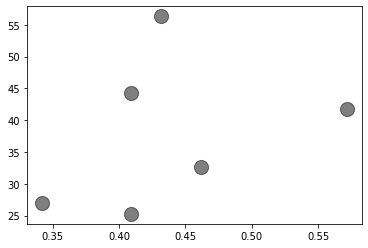

In [70]:
plt.scatter(kmodel.cluster_centers_[:,0],kmodel.cluster_centers_[:,1],c='black',s=200,alpha=0.5)

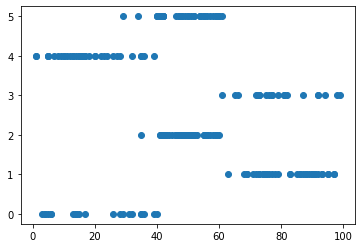

In [74]:
plt.scatter(newdf['Spending Score (1-100)'],newdf['Cluster'],marker='o')

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

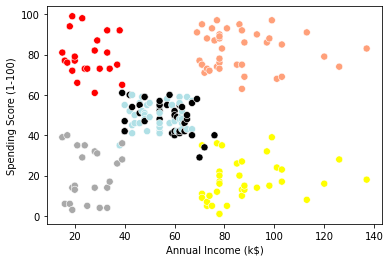

In [79]:
color = np.array(['darkgray', 'lightsalmon', 'powderblue', 'red', 'yellow', 'black'])
sns.scatterplot(x = newdf['Annual Income (k$)'],
                y = newdf['Spending Score (1-100)'],
                c=color[kmodel.labels_],
                s=50)

# Hierarchial KMeans

In [76]:
var=linkage(newdf,method='ward')

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [35.0, 35.0, 60.0, 60.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [85.0, 85.0, 102.5, 102.5],
  [47.5, 47.5, 93.75, 93.75],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [125.0, 125.0, 142.5, 142.5],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [170.0, 170.0, 190.0, 190.0],
  [133.75, 133.75, 180.0, 180.0],
  [70.625, 70.625, 156.875, 156.875],
  [12.5, 12.5, 113.75, 113.75],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [235.0, 235.0, 245.0, 245.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [240.0, 240.0, 262.5, 262.5],
  [212.5, 212.5, 251.25, 251.25],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [315.0, 315.0, 332.5, 332.5],
  [355.0, 355.0, 365

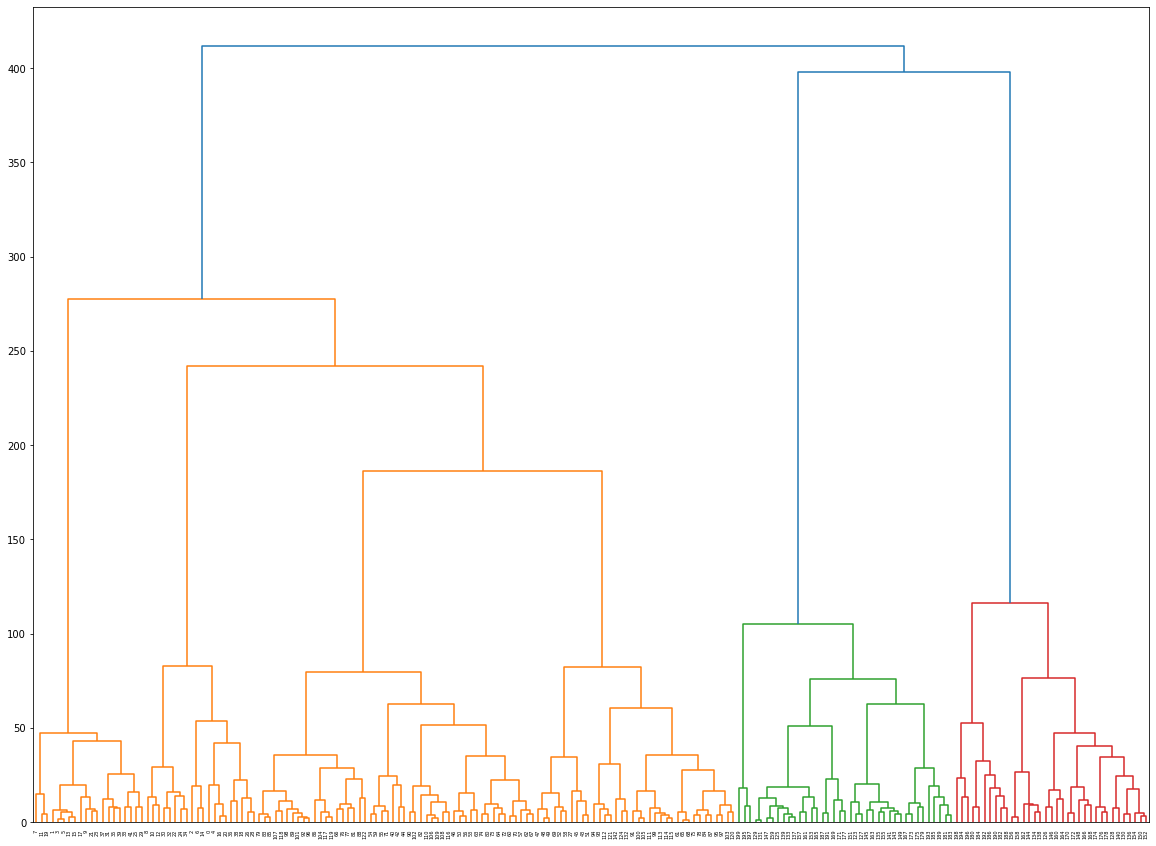

In [78]:
plt.figure(figsize=(20,15))
dendrogram(var,leaf_rotation=90)